In [14]:
import torch
import torchvision.models as models
from torchvision import transforms
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import vgg11
from sklearn.metrics import precision_score, recall_score

In [18]:

# Load pre-trained VGG11 model
vgg11 = torch.load('pretrained_vgg11')

vgg11.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vgg_model = vgg11.to(device)

In [25]:
data_path = "/home/mohamed_chaaben/Documents/Colorectal Cancer /"

In [26]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), transforms.ToTensor(),transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dataset = datasets.ImageFolder(data_path, transform=transform)

In [27]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

In [28]:
all_features = []
all_labels = []

with torch.no_grad():
    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = vgg11.features(images)
        outputs = vgg11.avgpool(outputs)
        outputs = torch.flatten(outputs, 1)
        all_features.append(outputs)
        all_labels.append(labels)    

In [29]:
all_features = torch.cat(all_features, dim=0).cpu().numpy()
all_labels = torch.cat(all_labels, dim=0).cpu().numpy()

In [30]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(all_features)

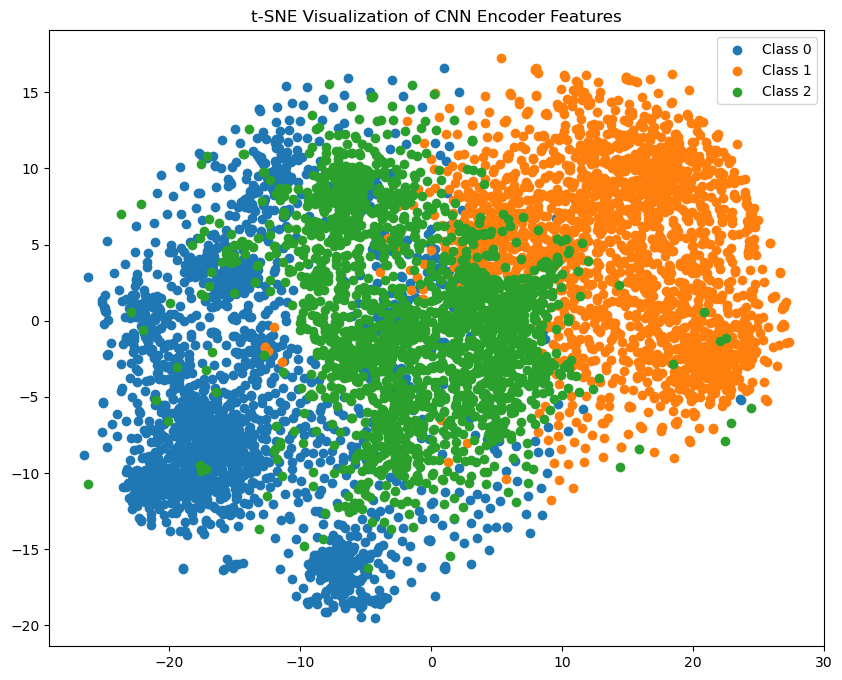

In [31]:
plt.figure(figsize=(10, 8))
for i in range(len(dataset.classes)):
    plt.scatter(tsne_result[all_labels == i, 0], tsne_result[all_labels == i, 1], label=f'Class {i}')

plt.title('t-SNE Visualization of CNN Encoder Features')
plt.legend()
plt.show()